In [5]:
import pandas as pd

reviews = pd.read_csv("/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/project3/data/reviews_with_setiment(full_file).csv")
products = pd.read_csv("/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/data/processed/cleaned_products.csv")


In [6]:
merged = pd.merge(reviews, products[['product_id', 'rating']], on='product_id', how='left')

merged['rating'] = pd.to_numeric(merged['rating'], errors='coerce')

merged.head()

,review_id,user_id,product_id,review_title,review_content,cleaned_review,cleaned_length,vader_scores,compound,sentiment,rating
0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.9419,Positive,4.2
1,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.9419,Positive,4.2
2,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.9419,Positive,4.2
3,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,113,"{'neg': 0.043, 'neu': 0.726, 'pos': 0.231, 'co...",0.9750,Positive,4.0
4,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,113,"{'neg': 0.043, 'neu': 0.726, 'pos': 0.231, 'co...",0.9750,Positive,4.0


In [7]:
def rating_to_sentiment(rating):

    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"
    
    
merged['rating_sentiment'] = merged['rating'].apply(rating_to_sentiment)

In [8]:
print(merged[['rating', 'rating_sentiment']].head())
print(merged['rating_sentiment'].value_counts())

   rating rating_sentiment
0     4.2         Positive
1     4.2         Positive
2     4.2         Positive
3     4.0         Positive
4     4.0         Positive
rating_sentiment
Positive    1350
Negative     383
Neutral        4
Name: count, dtype: int64


In [9]:

accuracy = (merged['rating_sentiment'] == merged['sentiment']).mean()
print(f"Sentiment accuracy vs rating: {accuracy:.2%}")


Sentiment accuracy vs rating: 77.20%


Overall Accuracy: 77.20%


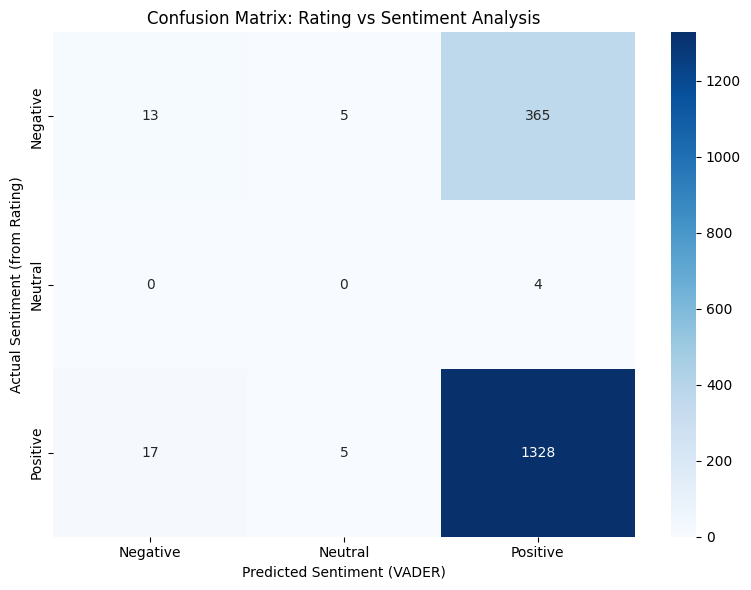


DETAILED CLASSIFICATION METRICS
              precision    recall  f1-score   support

    Negative       0.43      0.03      0.06       383
     Neutral       0.00      0.00      0.00         4
    Positive       0.78      0.98      0.87      1350

    accuracy                           0.77      1737
   macro avg       0.41      0.34      0.31      1737
weighted avg       0.70      0.77      0.69      1737


EXAMPLES OF MISMATCHED SENTIMENTS
Total mismatches: 396 (22.8%)

5-star reviews classified as negative:
Empty DataFrame
Columns: [review_content, rating, compound, sentiment]
Index: []


/var/folders/8w/9hxx_8m540zcg2yy692kdy480000gn/T/ipykernel_37045/2433176804.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(mismatches[(merged['rating'] == 5) & (merged['sentiment'] == 'Negative')][


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code...
accuracy = (merged['rating_sentiment'] == merged['sentiment']).mean()
print(f"Overall Accuracy: {accuracy:.2%}")

# Add confusion matrix
cm = confusion_matrix(merged['rating_sentiment'], merged['sentiment'], 
                      labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix: Rating vs Sentiment Analysis')
plt.xlabel('Predicted Sentiment (VADER)')
plt.ylabel('Actual Sentiment (from Rating)')
plt.tight_layout()
plt.savefig('../results/visualization/confusion_matrix.png', dpi=300)
plt.show()

# Classification report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION METRICS")
print("="*60)
print(classification_report(merged['rating_sentiment'], merged['sentiment']))

# Show mismatches
print("\n" + "="*60)
print("EXAMPLES OF MISMATCHED SENTIMENTS")
print("="*60)
mismatches = merged[merged['rating_sentiment'] != merged['sentiment']]
print(f"Total mismatches: {len(mismatches)} ({len(mismatches)/len(merged)*100:.1f}%)")

print("\n5-star reviews classified as negative:")
print(mismatches[(merged['rating'] == 5) & (merged['sentiment'] == 'Negative')][
    ['review_content', 'rating', 'compound', 'sentiment']
].head())